In [31]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [22]:
tweet_df = pd.read_csv("train_2kmZucJ.csv")
tweet_df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [23]:
tweet_df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


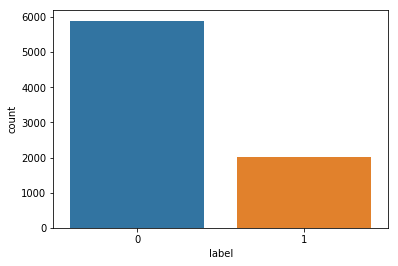

In [24]:
sns.countplot(x = 'label', data = tweet_df)

In [25]:
df  = pd.DataFrame(tweet_df[['id', 'tweet']])

(-0.5, 399.5, 199.5, -0.5)

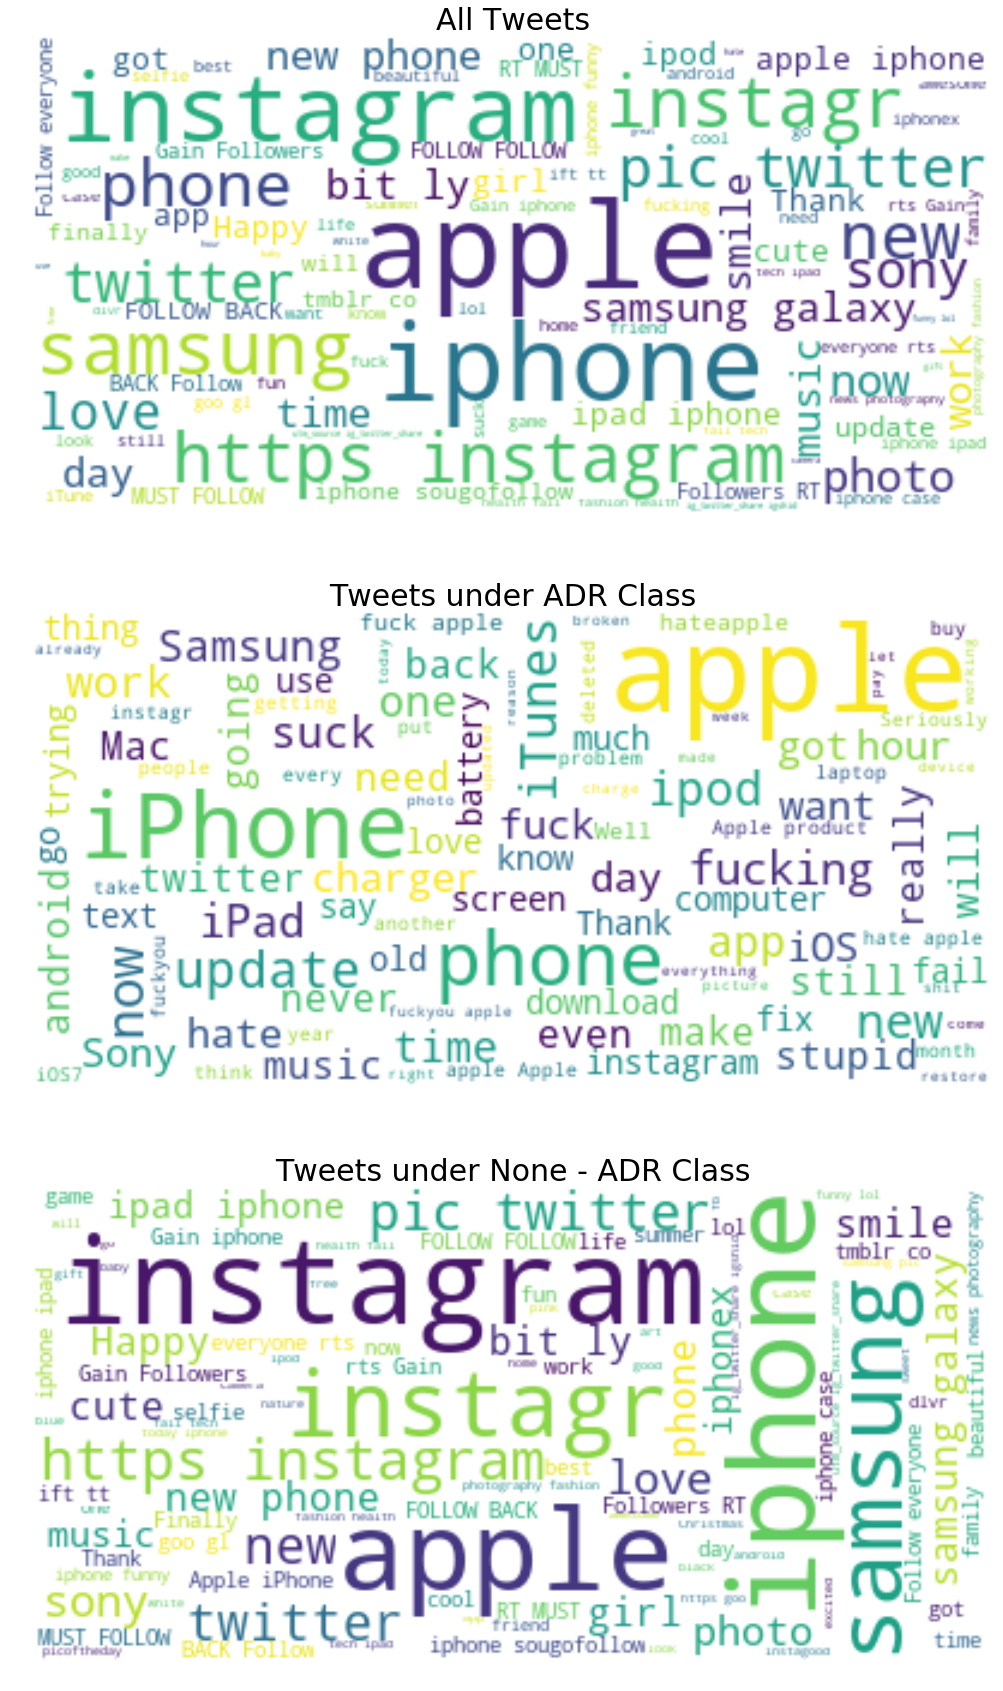

In [26]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = tweet_df[tweet_df['label']==1]
df_NADR = tweet_df[tweet_df['label']==0]
tweet_All = " ".join(review for review in df.tweet)
tweet_ADR = " ".join(review for review in df_ADR.tweet)
tweet_NADR = " ".join(review for review in df_NADR.tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')

In [27]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,id,tweet,Tweet_punct
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test httpsgooglhMfQV and...
1,2,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to ...
2,3,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememories un...
3,4,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way ...
4,5,What amazing service! Apple won't even talk to...,What amazing service Apple wont even talk to m...
5,6,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,Happy for us .. #instapic #instadaily #us #son...,Happy for us instapic instadaily us sony xper...
7,8,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable UK httpwwwebaycoukitm...
8,9,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music i...
9,10,Photo: #fun #selfie #pool #water #sony #camera...,Photo fun selfie pool water sony camera picoft...


In [28]:
stopword = nltk.corpus.stopwords.words('english')

In [37]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopword])
    return text
    
df['Tweet_nonstop'] = df['Tweet_punct'].apply(lambda x: remove_stopwords(x))
df.head(10)

,id,tweet,Tweet_punct,Tweet_nonstop
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test httpsgooglhMfQV and...,fingerprint Pregnancy Test httpsgooglhMfQV and...
1,2,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to ...,Finally transparant silicon case Thanks uncle ...
2,3,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememories un...,We love Would go talk makememories unplug rela...
3,4,I'm wired I know I'm George I was made that wa...,Im wired I know Im George I was made that way ...,Im wired I know Im George I made way iphone cu...
4,5,What amazing service! Apple won't even talk to...,What amazing service Apple wont even talk to m...,What amazing service Apple wont even talk ques...
5,6,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...,iPhone software update fucked phone big time S...
6,7,Happy for us .. #instapic #instadaily #us #son...,Happy for us instapic instadaily us sony xper...,Happy us instapic instadaily us sony xperia xp...
7,8,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable UK httpwwwebaycoukitm...,New Type C charger cable UK httpwwwebaycoukitm...
8,9,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music i...,Bout go shopping listening music iphone justme...
9,10,Photo: #fun #selfie #pool #water #sony #camera...,Photo fun selfie pool water sony camera picoft...,Photo fun selfie pool water sony camera picoft...


In [38]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Tweet_nonstop'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Tweet_nonstop'])
list_tokenized_test = tokenizer.texts_to_sequences(df['Tweet_nonstop'])

In [39]:
list_tokenized_train[:1]

[[2133, 6265, 1327, 6266, 15, 60, 39, 20, 100, 83, 93, 87, 1]]

C:\Users\hfarhidzadeh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


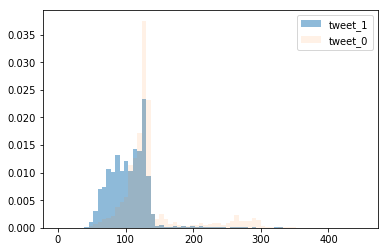

In [44]:
tweet_1 = tweet_df[tweet_df['label'] == 1]['tweet'].apply(lambda x: len(x))
tweet_0 = tweet_df[tweet_df['label'] == 0]['tweet'].apply(lambda x: len(x))

bins_ = np.linspace(0, 450, 70)

plt.hist(tweet_1, bins= bins_, normed=True, alpha = 0.5, label = 'tweet_1')
plt.hist(tweet_0, bins= bins_, normed=True, alpha = 0.1, label = 'tweet_0')
plt.legend()

In [41]:
maxlen = 300
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

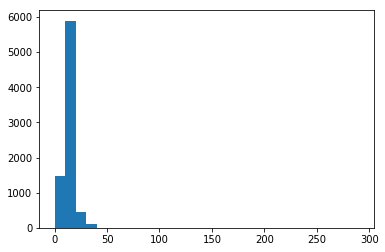

In [43]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,300,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [50]:
y = tweet_df['label'].values

inp = Input(shape=(maxlen, ))
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 7128 samples, validate on 792 samples
Epoch 1/2
7128/7128 [==============================] - 426s 60ms/step - loss: 0.3938 - acc: 0.8230 - val_loss: 0.2668 - val_acc: 0.8788
Epoch 2/2
7128/7128 [==============================] - 415s 58ms/step - loss: 0.1712 - acc: 0.9339 - val_loss: 0.2832 - val_acc: 0.8775
